# 3. 분류 연습문제 풀이

### 문제 풀이를 위한 데이터 준비 (MNIST 데이터)

In [1]:
# 데이터 불러오기
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape) # data 키: 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열
print(y.shape) # target 키: 레이블 배열

(70000, 784)
(70000,)


In [3]:
import numpy as np
y=y.astype(np.uint8) # 대부분 숫자이므로 target 값을 정수로 변환

In [4]:
# test 와 train split: 이미 데이터 자체가 섞여있으므로 앞에서부터 60000개 단위로 추출함.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 1번. MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요. 
 - Hint: KNeighborsClassifier 사용하여 weights와 n_neighbors를 하이퍼파라미터로 그리드 탐색.

In [7]:
# 파라미터를 default로 설정하고 학습시키기
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_train) # n_neighbors= 5, weights='uniform'

KNeighborsClassifier()

In [6]:
# 예측 및 평가
from sklearn.metrics import accuracy_score

y_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_knn_pred)

0.9688

### KNeighborsClassifier의 원리 및 옵션 


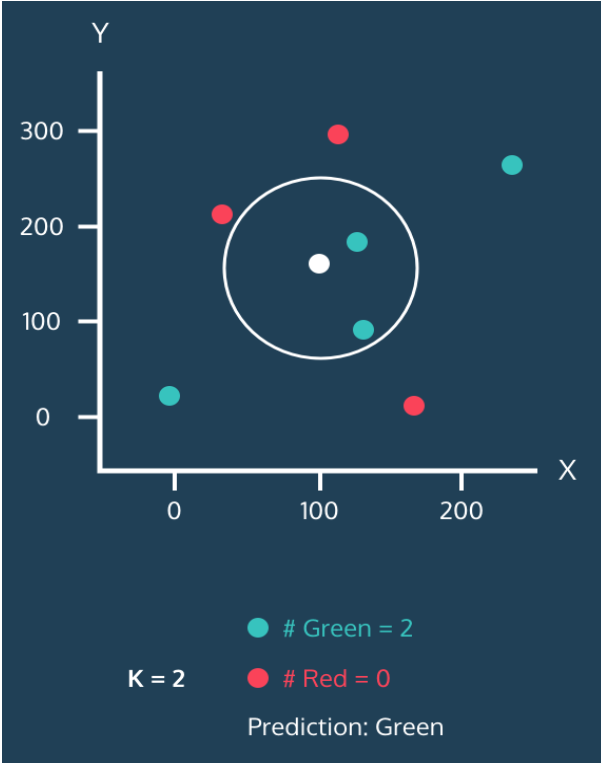
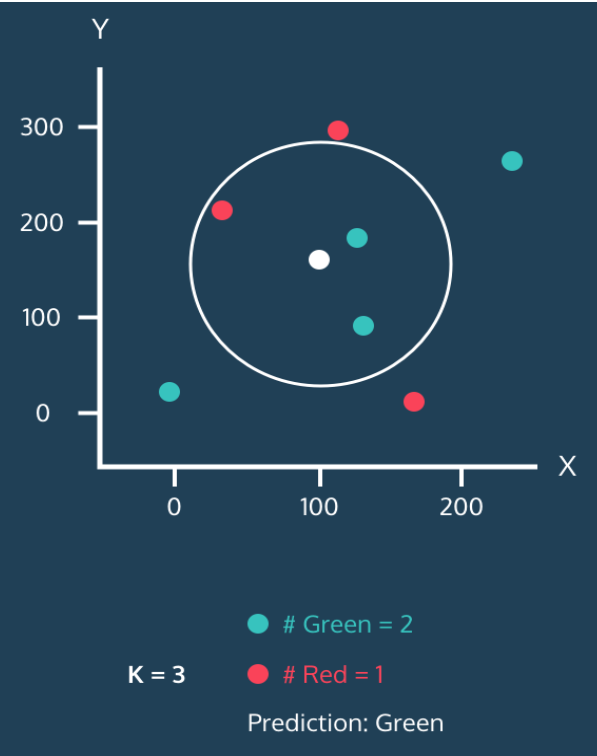


- 예측하고자하는 점 주변의 data 값을 이용하여 분류한다.

- K가 너무 작을 경우 overfitting이 일어난다. (아주 근처에 있는 점만 영향을 주기 때문)

- K가 너무 클 경우 underfitting이 일어난다. (모든 데이터가 동일한 방식으로 분류되기 때문에 의미가 없다.)

- 출처: https://hleecaster.com/ml-knn-concept/


#### 파라미터 의미

- 'n_neighbors' : 예측에 사용하고자하는 이웃의 개수

- 'weights': 예측할 때 주는 가중치

 --> 'uniform': 전부 같은 가중치를 준다.
 
 --> 'distace': 거리가 가까운 data일수록 더 높은 가중치를 준다.
 
 --> [callable]: 사용자 설정 함수

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=18.7min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 18.7min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.968, total=18.1min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 36.8min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.968, total=19.5min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=19.6min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.969, total=18.4min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.969, total=18.2min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.966, total=17.8min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.966, total=17.6min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.967, total=17.6min
[CV] n_neighbors=4, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 324.2min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [30]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [31]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test) # 예측
accuracy_score(y_test, y_pred) # 정확도 확인

0.9714

### 2번. MNIST 이미지를 한 픽셀 이동시킬 수 있는 함수를 만들어 보세요. 그런 다음 각 이미지에 대해 네 개의 이동된 복사본을 만들어 훈련세트에 추가하세요. 마지막으로 이 확장된 데이터셋에서 앞에서 찾은 최선의 모델을 훈련시키고 테스트 세트에서 정확도를 측정해보세요. (데이터 증식, 훈련세트 확장)

##### MNIST 이미지를 한 픽셀 이동

- scipy.ndimage.interpolation 모듈의 shift()함수를 사용.

- shift(image, [2,1], cval=0)은 이미지를 아래로 2픽셀, 오른쪽으로 1픽셀 이동시킨다.



< shift 함수의 파라미터: scipy.ndimage.interpolation.shift(input, shift, output=None, order=3, mode='constant', cval=0.0, prefilter=True)>

- input : ndarray, The input array.

- shift : float or sequence, optional. The shift along the axes. If a float, shift is the same for each axis. If a sequence, shift should contain one value for each axis.

- cval : scalar, optional. Value used for points outside the boundaries of the input if mode='constant'. Default is 0.0

In [5]:
from scipy.ndimage.interpolation import shift

In [14]:
import numpy as np

array = np.array([1,2,3,4,5])
print(array.shape)
result = shift(array, 3, cval=0)
print(result)

(5,)
[0 0 0 1 2]


In [17]:
array = np.array([[1,2,3,4,5],
                 [6,7,8,9,10],
                 [11,12,13,14,15]])
print(array.shape)
result = shift(array, [0,1], cval=0)
print("오른쪽으로 이동:\n", result)
print()
result = shift(array, [1,0], cval=0)
print("아래로 이동:\n", result)

(3, 5)
오른쪽으로 이동:
 [[ 0  1  2  3  4]
 [ 0  6  7  8  9]
 [ 0 11 12 13 14]]

아래로 이동:
 [[ 0  0  0  0  0]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]]


##### 1) 픽셀 이동 함수 작성

In [23]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28)) # 28*28 배열로 바꿔준다
    shifted_image = shift(image, [dy, dx], cval=0)
    return shifted_image.reshape([-1]) # 다시 원래 데이터 형태(1차원)으로 바꿔준다.

##### 2) 복사본을 만들어 훈련세트에 추가

In [26]:
# 원래 데이터에서 복제된 데이터가 추가된 array를 만든다.

# 기존 데이터 복제
X_train_augmented = [image for image in X_train] # train 데이터 복제 (list 형태로 변환--> list 안에 array가 여러개 있음)
y_train_augmented = [label for label in y_train] 

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)): # 방향 변화, (아래, 위, 오른쪽, 왼쪽)
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy)) # X 데이터를 복제
        y_train_augmented.append(label) # 복제한 데이터를 y와 대응

# array로 변환
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

##### 3) 모델훈련

- 데이터 섞기: np.random.permutation()

- 단일 숫자를 대입해주는 경우 np.range(input)을 만들어 섞어준다.

- index를 섞어준 후, 이 순서대로 데이터를 재배치한다.

In [28]:
## 데이터 섞기
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [32]:
# 모델훈련
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [33]:
# 성능확인
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763